In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import json
import os
import cv2
from PIL import Image
from sklearn.preprocessing import OneHotEncoder


In [2]:
df_photo = pd.read_json('photos.json', lines=True)
        

In [3]:
df_photo.head()

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


In [4]:
df_photo.info

<bound method DataFrame.info of                       photo_id             business_id  \
0       zsvj7vloL4L5jhYyPIuVwg  Nk-SJhPlDBkAZvfsADtccA   
1       HCUdRJHHm_e0OCTlZetGLg  yVZtL5MmrpiivyCIrVkGgA   
2       vkr8T0scuJmGVvN2HJelEA  _ab50qdWOk0DdB6XOrBitw   
3       pve7D6NUrafHW3EAORubyw  SZU9c8V2GuREDN5KgyHFJw   
4       H52Er-uBg6rNrHcReWTD2w  Gzur0f0XMkrVxIwYJvOt2g   
...                        ...                     ...   
200095  4Zia9NkAfQNjMfcIDhwJ-g  2HxkdqHmbYGj_BH1bLaiSw   
200096  KB96KRZRhRm8hUkI-OpGEA  _gVyuTRb_6HM-SNtqbpevQ   
200097  Klmojvaf2_2dP1XKzTsFmQ  NUyEOjfAl3HvkpzSpdwqeA   
200098  FNEiq7Mogec7t31OaU5juw  hE6YsHHV0fCz_UrGS4o6VA   
200099  NHEtLh7APk7Yssjo0h45VA  VIYvcX9SScnqmoI0so1KZA   

                                                  caption    label  
0       Nice rock artwork everywhere and craploads of ...   inside  
1                                                          outside  
2                                          oyster shooter    dri

In [5]:
df_photo.shape

(200100, 4)

In [6]:
df_photo.describe(include= 'all')

,photo_id,business_id,caption,label
count,200100,200100,200100,200100
unique,200098,36680,76413,5
top,_CYoxbCIKuAwpq4crHCPWg,FEXhWNCMkv22qG04E83Qjg,,food
freq,2,528,103366,108152


# Image Preprocessing


In [7]:
# looking for the missing values in the data
missing_values = df_photo.isnull().sum()
print("missing values are:\n", missing_values)
print("\n                            There are no missing values in the dataset")

missing values are:
 photo_id       0
business_id    0
caption        0
label          0
dtype: int64

                            There are no missing values in the dataset


In [8]:
 # Checking for the duplicate values
duplicate = df_photo.duplicated().sum()
print("No. of duplicate are:", duplicate)
print("\n                                There are no duplicate values")

No. of duplicate are: 0

                                There are no duplicate values


In [9]:
## defining the paths of photos
input_dir = r'C:\Users\Asus\Downloads\yelp_photos\yelp_photos\photos'  
output_dir = r'C:\Users\Asus\Downloads\yelp_photos\processed_images'  

# Creating the output directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Set the size of images
new_img_size = (224, 224)  # Resizing the photos to 224 x 224 pixels

# Setting the limit to process photos
processed_img_count = 0
max_process_limit = 10000  # Only 10,000 images will be processed

for filename in os.listdir(input_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Checking the format of photos
        img_path = os.path.join(input_dir, filename)

        try:
            # Read photos using OpenCV
            img = cv2.imread(img_path)

            # Ensuring if the image is loaded correctly or not
            if img is None:
                print(f"Error reading {filename}: Unsupported format or image not found.")
                continue
            
            # Resizing images
            resized_img = cv2.resize(img, new_img_size)

            # Converting to a different format (e.g., PNG)
            output_filename = os.path.join(output_dir, os.path.splitext(filename)[0] + '.png')
            cv2.imwrite(output_filename, resized_img)

            processed_img_count += 1  # Processed image count
            print(f"Processed {filename}")

            # The loop will break when 10,000 images have been processed
            if processed_img_count >= max_process_limit:
                print(f"{max_process_limit} images have been processed.")
                break

        except Exception as e:
            print(f"Error processing {filename}: {e}")


Processed --0h6FMC0V8aMtKQylojEg.jpg
Processed --3JQ4MlO-jHT9xbo7liug.jpg
Processed --3P3fjPrScy06XVLi4vhg.jpg
Processed --4DfhW2sJvjeC90KEDX3g.jpg
Processed --5V3mRlhb3zqE5yF4Gpaw.jpg
Processed --7SiWWk_OHbdmcU4pNDQw.jpg
Processed --8pNvGp9ICBjJVck2OnTQ.jpg
Processed --9cH8_rrskfmYvONaJpgQ.jpg
Processed --9zKbcEd-DXH4ZUiEI4UA.jpg
Processed --AU_cPMgrWSPluP1v8n_Q.jpg
Processed --CXLzKP6hhYVs54GVOT0Q.jpg
Processed --cxOTSQzInwUOAPwceUuA.jpg
Processed --dacvi4Y_8ACp-10nafMA.jpg
Processed --dM6T1gVl050fS_vkV3Xg.jpg
Processed --DqlLaO1I0D7uFgvRInww.jpg
Processed --e8vgtonVwPXG3n6lfBLA.jpg
Processed --EjX0WhEFSDVv9mtAeiOQ.jpg
Processed --FrnLlpbF2_dRRlZ_dovg.jpg
Processed --Giyv3aAypzllFEp5d8Eg.jpg
Processed --gjH9oA92f7OuTSovXjCg.jpg
Processed --GXT_8apxBAs7epcHf-zA.jpg
Processed --hMxFnB1b_UeDwzsOCmCA.jpg
Processed --HO-fMoTVbYnxVZdWAIGQ.jpg
Processed --I-ThZdBaYfbSlAQhfOfQ.jpg
Processed --IHD2ZgFPfFMR4qMkLzFA.jpg
Processed --j4xVIdIlYpOmZbs7iszg.jpg
Processed --J8VXQsdPNxPXKCRyqakg.jpg
P

# Sample of Image Resizing

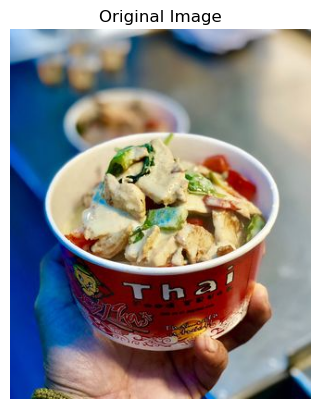

In [10]:
from matplotlib import pyplot as plt
img_file = '__RMLkfCq_spMU1Q5TDHnA.jpg'  
input_img = cv2.imread(img_file)

# this function is created for plotting
def show_image(image_data, image_title, color_map=None):
    if len(image_data.shape) == 2 or color_map is not None:  
        plt.imshow(image_data, cmap=color_map)
    else:
        plt.imshow(image_data)
    plt.axis('off')  # Hide axis
    plt.title(image_title)
    plt.show()

# plotting the original image
input_img_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
show_image(input_img_RGB, "Original Image")

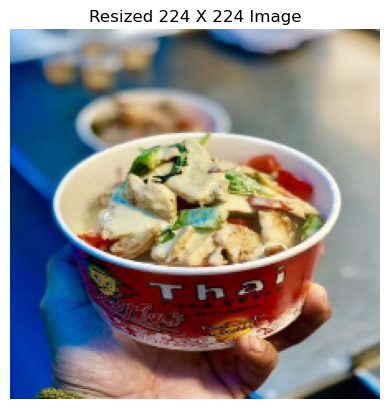

In [11]:
# plotting resize image
target_dim = (224, 224)
resized_photo = cv2.resize(input_img, target_dim)
resized_photo_rgb = cv2.cvtColor(resized_photo, cv2.COLOR_BGR2RGB)
show_image(resized_photo_rgb, "Resized 224 X 224 Image")

# Extracting labels

In [12]:
# loading file
json_data = r'C:\Users\Asus\Downloads\yelp_photos\yelp_photos\photos.json'

# Extracting labels from dataset
def ext_labels(json_data):
    labels_list = []

    try:
        with open(json_data, 'r') as f:
            for line in f:
                line = line.strip()
                if line:  # to make sure it is not an empty line
                    try:
                        photo = json.loads(line)  
                        photo_id = photo.get('photo_id')
                        business_id = photo.get('business_id')
                        caption = photo.get('caption')
                        label = photo.get('label') 

                       
                        labels_list.append((photo_id, business_id, caption, label)) 
                         # appending photo_id, business_id, caption, and label to the list

                    except json.JSONDecodeError as e:
                        print(f"Error decoding JSON: {e} in line: {line}")

    except FileNotFoundError:
        print(f"File not found: {json_data}")

    return labels_list

####  onehot encoding for 1000 labels #####




# One hot encoding

In [13]:
def hot_labels(labels_list, max_categories=1000):
    # Converting to dataframe
    df = pd.DataFrame(labels_list, columns=['photo_id', 'business_id', 'caption', 'label'])

    # Dropping rows with null labels
    df = df.dropna(subset=['label'])

    # for unique labels
    all_labels = df['label'].unique()
    lim_labels = sorted(all_labels)[:max_categories]  

    # creating onehot encoded matrix
    encoder = OneHotEncoder(sparse=False, categories=[lim_labels])
    one_hot_labels = encoder.fit_transform(df['label'].values.reshape(-1, 1))

    # converting onehot encoded matrix to dataframes
    one_hot_df = pd.DataFrame(one_hot_labels, columns=lim_labels)

    # Combine with photo IDs and business IDs
    final_df = pd.concat([df[['photo_id', 'business_id']], one_hot_df], axis=1)

    return final_df

# applying the functions
labels_list = ext_labels(json_data)  # for extracting labels
if labels_list:
    final_df = hot_labels(labels_list)  # for Onehot encoded labels
    print(final_df.head())  
else:
    print("Can't find labels")

                 photo_id             business_id  drink  food  inside  menu  \
0  zsvj7vloL4L5jhYyPIuVwg  Nk-SJhPlDBkAZvfsADtccA    0.0   0.0     1.0   0.0   
1  HCUdRJHHm_e0OCTlZetGLg  yVZtL5MmrpiivyCIrVkGgA    0.0   0.0     0.0   0.0   
2  vkr8T0scuJmGVvN2HJelEA  _ab50qdWOk0DdB6XOrBitw    1.0   0.0     0.0   0.0   
3  pve7D6NUrafHW3EAORubyw  SZU9c8V2GuREDN5KgyHFJw    0.0   1.0     0.0   0.0   
4  H52Er-uBg6rNrHcReWTD2w  Gzur0f0XMkrVxIwYJvOt2g    0.0   1.0     0.0   0.0   

   outside  
0      0.0  
1      1.0  
2      0.0  
3      0.0  
4      0.0  


E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
